In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.8.0
Hub version: 0.12.0
GPU available (YESS!!!!)


In [2]:
# Use the '-d' parameter as the destination for where the files should go
#!unzip "drive/My Drive/Data/dog-breed-identification.zip" -d "drive/My Drive/Data/Dog_Breed_identification_Deep_learning"

In [3]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog_Breed_identification_Deep_learning/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


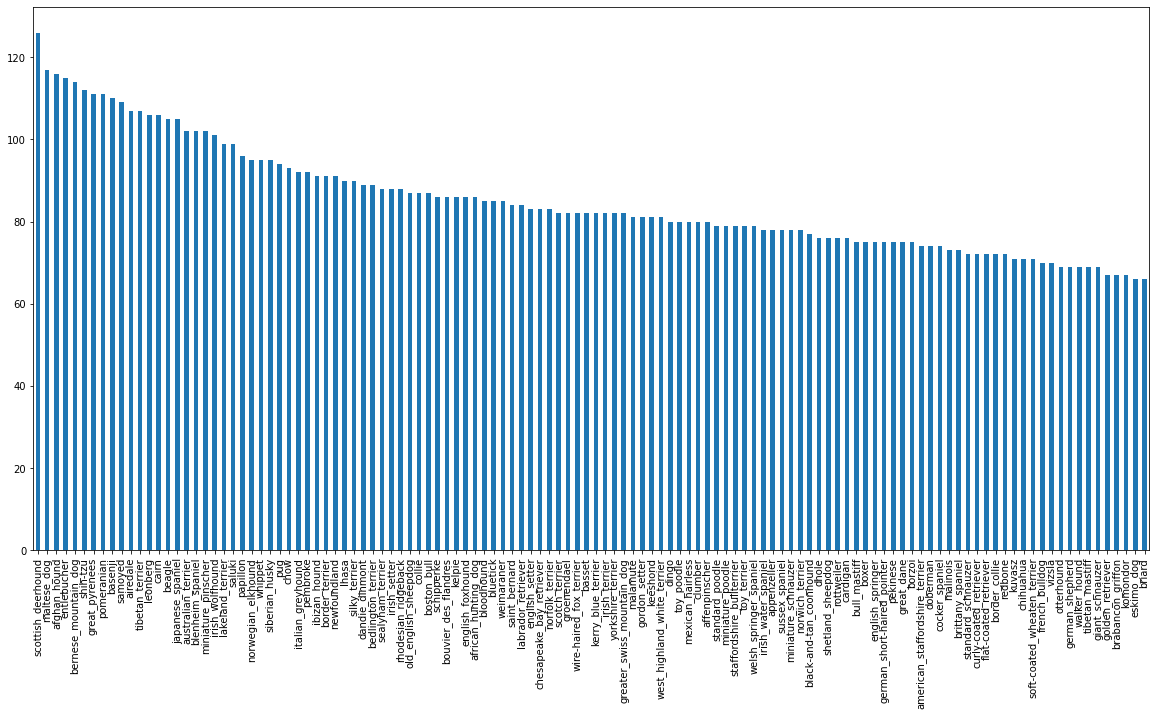

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [5]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog_Breed_identification_Deep_learning/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[9000]

'drive/MyDrive/Dog_Breed_identification_Deep_learning/train/e20e32bf114141e20a1af854ca4d0ecc.jpg'

In [ ]:
import os
if len(os.listdir("/content/drive/MyDrive/Dog_Breed_identification_Deep_learning/train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


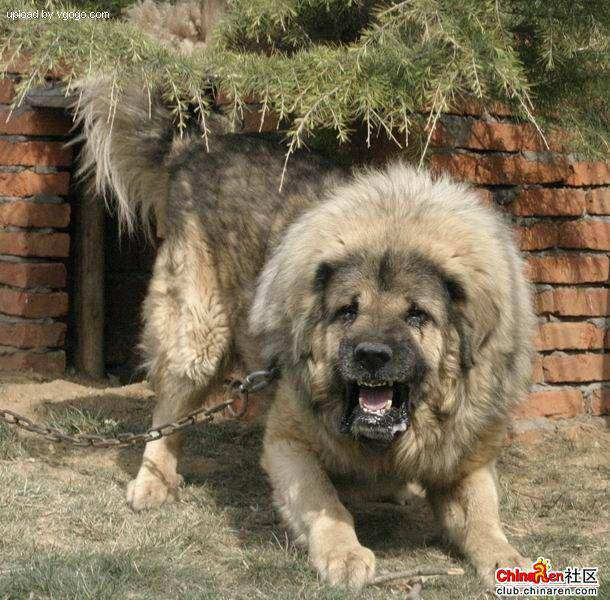

In [6]:
from IPython.display import display, Image
Image(filenames[9000])

In [7]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [8]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [9]:
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [11]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [12]:
X = filenames
y = boolean_labels

In [13]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [14]:
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [15]:
X_train[:5], y_train[:2]

(['drive/MyDrive/Dog_Breed_identification_Deep_learning/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Breed_identification_Deep_learning/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog_Breed_identification_Deep_learning/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog_Breed_identification_Deep_learning/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog_Breed_identification_Deep_learning/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fals

In [16]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [17]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [18]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [19]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [20]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [21]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [22]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [23]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [24]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [25]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [26]:
%load_ext tensorboard

In [27]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog_Breed_identification_Deep_learning/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [28]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [29]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [30]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 165s 6s/step - loss: 4.5856 - accuracy: 0.0975 - val_loss: 3.4353 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 5s 193ms/step - loss: 1.6612 - accuracy: 0.6562 - val_loss: 2.1682 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 5s 180ms/step - loss: 0.5805 - accuracy: 0.9300 - val_loss: 1.6883 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 4s 173ms/step - loss: 0.2559 - accuracy: 0.9862 - val_loss: 1.5100 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 5s 186ms/step - loss: 0.1480 - accuracy: 0.9975 - val_loss: 1.4369 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 5s 185ms/step - loss: 0.1011 - accuracy: 0.9987 - val_loss: 1.3917 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================]

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

<IPython.core.display.Javascript object>

In [35]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions 

7/7 [==============================] - 25s 2s/step


array([[1.76670437e-03, 7.15258720e-05, 1.45163562e-03, ...,
        1.75066525e-04, 8.23518494e-05, 4.73734317e-03],
       [1.39269163e-03, 4.10556182e-04, 1.16023198e-02, ...,
        2.07438818e-04, 1.95343816e-03, 1.61776610e-04],
       [1.21973480e-05, 2.65905284e-04, 1.42043855e-05, ...,
        3.41898158e-05, 3.66433960e-05, 4.68056853e-04],
       ...,
       [6.28812222e-06, 6.68588154e-06, 2.79747437e-05, ...,
        2.16453245e-05, 4.71104198e-04, 3.29783361e-05],
       [8.85585323e-04, 9.06778223e-05, 2.19565438e-04, ...,
        6.37182820e-05, 5.90138516e-05, 5.54868393e-03],
       [6.95908209e-04, 1.45326063e-04, 9.95095237e-04, ...,
        2.39257491e-03, 8.26533185e-04, 1.38219286e-04]], dtype=float32)

In [36]:
predictions.shape

(200, 120)

In [37]:
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[1.76670437e-03 7.15258720e-05 1.45163562e-03 8.36399267e-05
 4.37433715e-04 3.29904906e-05 1.30042816e-02 4.08334844e-03
 3.46823857e-04 7.52251581e-05 4.22067897e-05 5.28235105e-04
 5.43107220e-04 6.93325928e-05 5.29667188e-04 2.88664130e-04
 2.73691239e-05 1.86791539e-01 1.51319737e-05 7.03118785e-05
 1.11587295e-04 1.62149736e-04 8.79047002e-05 2.62352376e-04
 3.58371297e-04 3.72576818e-04 2.79508084e-01 4.44465077e-05
 3.22443433e-04 3.83223261e-04 8.48687923e-05 2.79467949e-03
 1.16320339e-03 1.73812186e-05 1.03173632e-04 1.50360335e-02
 8.41570818e-06 3.59710626e-04 3.95311508e-04 2.78411462e-04
 1.30729086e-03 7.27738807e-05 8.01278002e-05 1.40671918e-05
 2.46781674e-05 3.39934893e-04 1.75124624e-05 2.13171588e-04
 9.95551818e-04 9.94389848e-05 5.18583285e-04 5.73621001e-05
 2.87639268e-04 1.06872212e-04 2.94413512e-05 4.86173958e-05
 2.96506827e-04 1.95902423e-03 4.71135747e-04 1.01659462e-01
 1.05187275e-04 1.26412662e-04 1.07278232e-03 1.56734932e-05
 1.30628527e-04 3.444550

In [38]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [39]:
get_pred_label(boolean_labels[0])

'boston_bull'

In [40]:
len(labels)

10222

In [41]:
# # Create a function to unbatch a batched dataset
# def unbatchify(data):
#   """
#   Takes a batched dataset of (image, label) Tensors and returns separate arrays
#   of images and labels.
#   """
#   images = []
#   labels = []
#   # Loop through unbatched data
#   for image, label in data.unbatch().as_numpy_iterator():
#     images.append(image)
#     labels.append(unique_breeds[np.argmax(label)])
#   return images, labels

# # Unbatchify the validation data
# val_images, val_labels = unbatchify(val_data)
# val_images[0], val_labels[0]

In [42]:
def unbatchify(data):
  images=[]
  labels=[]

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


In [43]:
val_images,val_labels = unbatchify(val_data)

In [44]:
val_images[0] ,val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [45]:
val_labels[0]

'cairn'

In [46]:
import matplotlib.pyplot as plt

In [47]:
def plot_preds(prediction_probabilities,labels,images,n=1):
  pred_prob , true_label ,image = prediction_probabilities[n],labels[n],images[n]

  pred_label=get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  plt.title("{} {:.2f} {}".format(pred_label,np.max(pred_prob)*100,true_label))

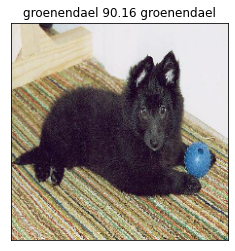

In [48]:
plot_preds(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,n=77)

In [49]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_probs, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_probs)

  top_10_pred_index = pred_probs.argsort()[-10:][::-1]
  top_10_pred_values = pred_probs[top_10_pred_index]
  top_10_pred_labels=unique_breeds[top_10_pred_index]


  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [50]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

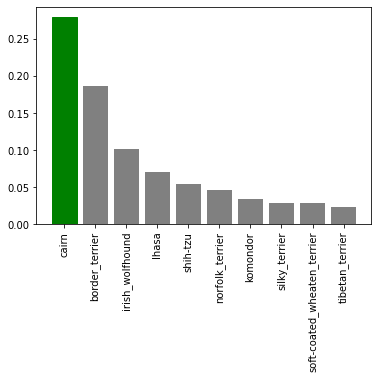

In [51]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=0)

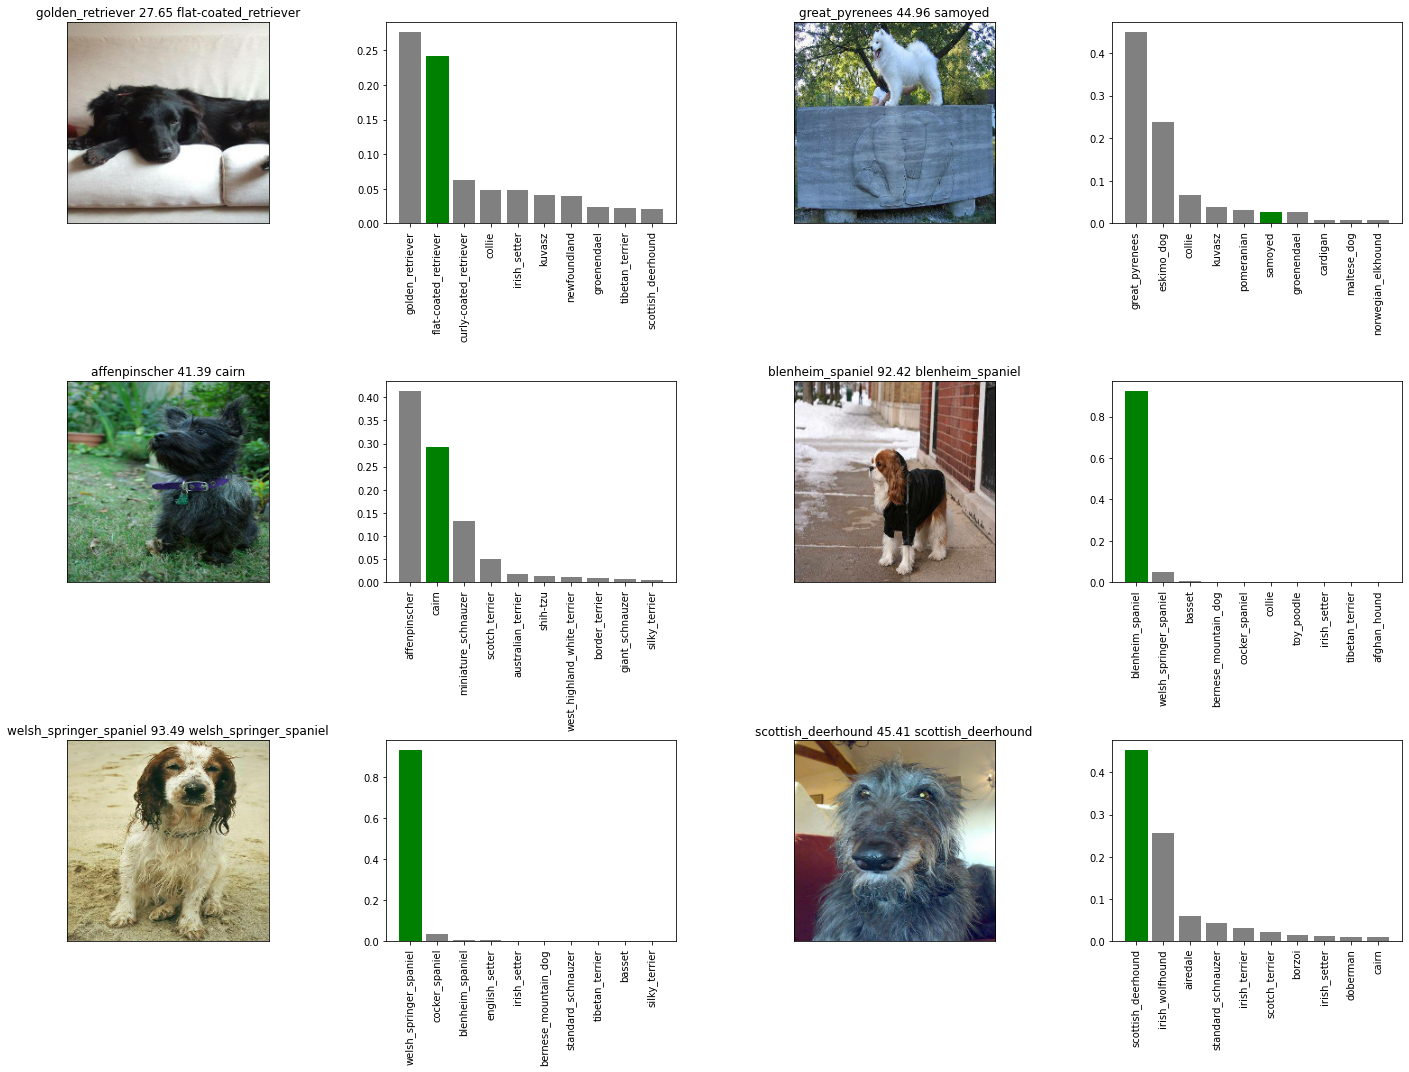

In [52]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_preds(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [53]:
def save_model(model , suffix=None):
  model_dir=os.path.join("drive/MyDrive/Dog_Breed_identification_Deep_learning/models ",  datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

  model_path=model_dir + "-" + suffix + ".h5" 
  print(f"saving model to... {model_path}")
  model.save(model_path)
  return model_path

In [33]:
def load_model(model_path):
  return tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})


In [ ]:
save_model(model , suffix ="1000_img_trained_model")

saving model to... drive/MyDrive/Dog_Breed_identification_Deep_learning/models /20220414-11161649935005-1000_img_trained_model.h5


'drive/MyDrive/Dog_Breed_identification_Deep_learning/models /20220414-11161649935005-1000_img_trained_model.h5'

In [55]:
import os

In [34]:
model=load_model("/content/drive/MyDrive/Dog_Breed_identification_Deep_learning/models /20220414-11161649935005-1000_img_trained_model.h5")

In [56]:
test_filenames=["drive/MyDrive/Dog_Breed_identification_Deep_learning/test/"+ fnames for fnames in os.listdir("drive/MyDrive/Dog_Breed_identification_Deep_learning/test")]

In [65]:
full_data=create_data_batches(X,y=y)

Creating training data batches...


In [66]:
full_data_tensorboard_callback=create_tensorboard_callback()
full_data_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy" , patience=3)

In [67]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [68]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_data_tensorboard_callback,full_data_early_stopping])

Epoch 1/100
320/320 [==============================] - 1004s 3s/step - loss: 1.3456 - accuracy: 0.6680
Epoch 2/100
320/320 [==============================] - 48s 150ms/step - loss: 0.3977 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 47s 146ms/step - loss: 0.2385 - accuracy: 0.9360
Epoch 4/100
320/320 [==============================] - 50s 155ms/step - loss: 0.1548 - accuracy: 0.9624
Epoch 5/100
320/320 [==============================] - 51s 158ms/step - loss: 0.1054 - accuracy: 0.9793
Epoch 6/100
320/320 [==============================] - 47s 145ms/step - loss: 0.0788 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 48s 150ms/step - loss: 0.0577 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 51s 158ms/step - loss: 0.0461 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 52s 163ms/step - loss: 0.0375 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 55s 173ms

In [69]:
save_model(full_model,suffix="All_images")

saving model to... drive/MyDrive/Dog_Breed_identification_Deep_learning/models /20220415-09281650014899-All_images.h5


'drive/MyDrive/Dog_Breed_identification_Deep_learning/models /20220415-09281650014899-All_images.h5'

In [60]:
test_filenames[:10]

['drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e59d59ffbb65d9eae166d4068af5d9b9.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/df2b5cee4b3d8a3cb893b668df16d572.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/def88eeacc633cbc3d46d5f5fb495379.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/deed28298a869f87cf0372f592a21d43.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e713f150e4f9fc828f8a28705755f199.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e64296ffbae301f86c8728834c507cb6.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e4369279919beecfb6d91a5375bc122f.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e0072c3d9bee718b68ff1cf964a52536.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e07e608afaa89ee4ee939ad0a3bd3224.jpg',
 'drive/MyDrive/Dog_Breed_identification_Deep_learning/test/e6d6ff5b33e6174158d5ab05a7eda95c.jpg']

In [61]:
len(test_filenames)

10357

In [62]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [63]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [70]:
full_data_preds=full_model.predict(test_data)

In [71]:
full_data_preds

array([[2.02999928e-08, 1.78948124e-11, 3.01899994e-09, ...,
        5.16283856e-11, 1.55144153e-09, 1.49328657e-11],
       [2.98928704e-08, 1.50221666e-08, 1.28488817e-10, ...,
        8.31230640e-10, 2.25726193e-09, 4.17887343e-08],
       [1.03307550e-10, 4.63966074e-08, 7.55712559e-09, ...,
        5.47994546e-07, 1.13350025e-05, 9.30895283e-07],
       ...,
       [6.10369098e-05, 1.43130374e-09, 1.42125123e-06, ...,
        1.43759999e-08, 6.32879221e-07, 1.65932036e-07],
       [1.79445706e-07, 7.20175422e-08, 2.88414867e-07, ...,
        3.08274095e-09, 1.21295898e-05, 1.42816162e-07],
       [1.30133748e-09, 2.89689179e-08, 2.91916002e-09, ...,
        2.53080742e-07, 4.00441493e-08, 1.27503552e-06]], dtype=float32)

In [ ]:
id=[fnames for fnames in os.listdir("drive/MyDrive/Dog_Breed_identification_Deep_learning/test")]
id

In [73]:
id=[name.split('.')[0] for name in id]

In [ ]:
id

In [86]:
final_df=pd.DataFrame(columns=["id"]+list(unique_breeds) )

In [87]:
final_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [88]:
final_df["id"]=id

In [90]:
final_df[unique_breeds]=full_data_preds

In [91]:
final_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e59d59ffbb65d9eae166d4068af5d9b9,2.029999e-08,1.789481e-11,3.019000e-09,7.784814e-11,1.516289e-09,1.017885e-13,4.848894e-10,2.742589e-08,1.533821e-08,...,1.843267e-07,3.540096e-07,4.466184e-10,6.913397e-12,2.231188e-10,1.130802e-10,5.517507e-09,5.162839e-11,1.551442e-09,1.493287e-11
1,df2b5cee4b3d8a3cb893b668df16d572,2.989287e-08,1.502217e-08,1.284888e-10,3.481610e-12,2.227422e-13,8.499377e-12,6.708250e-13,2.873426e-12,6.032312e-11,...,5.913432e-07,1.288939e-09,1.797850e-11,1.783980e-13,6.939650e-12,1.121284e-12,2.142495e-10,8.312306e-10,2.257262e-09,4.178873e-08
2,def88eeacc633cbc3d46d5f5fb495379,1.033076e-10,4.639661e-08,7.557126e-09,5.618208e-09,6.927908e-09,6.217664e-12,2.144567e-06,9.543596e-09,7.882201e-05,...,1.165054e-06,1.909382e-09,3.706454e-12,4.317586e-11,7.094544e-11,2.862144e-08,2.127078e-06,5.479945e-07,1.133500e-05,9.308953e-07
3,deed28298a869f87cf0372f592a21d43,4.880718e-08,1.503236e-06,7.058661e-12,1.372566e-09,7.435501e-10,3.024231e-07,6.425317e-08,5.028033e-06,1.369794e-08,...,1.486050e-08,1.407767e-11,6.108601e-11,2.751428e-09,1.094944e-09,7.372975e-08,2.175183e-11,3.371498e-10,5.337405e-11,1.864515e-11
4,e713f150e4f9fc828f8a28705755f199,3.655538e-13,1.047972e-15,7.600370e-11,9.293089e-16,3.047453e-11,1.660356e-09,3.533759e-11,2.212216e-07,1.826384e-14,...,6.222898e-12,9.996306e-01,8.239378e-16,1.223711e-11,3.634360e-14,2.078739e-13,1.316080e-09,1.310654e-10,6.425751e-12,3.912504e-09


In [93]:
final_df.to_csv("/content/drive/MyDrive/Dog_Breed_identification_Deep_learning/final_preds.csv")